import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning 
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [ ]:
filename = "Truecaller_dataset.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,userName,score,at,content
0,ahmad zuhdi 87,5,2023-05-16 04:07:56,Mantap dan sangat membantu selalu yang terbaik
1,Dian Rahmania,5,2023-05-16 03:22:05,Aplikasi wajib download
2,Joe Wijaya,5,2023-05-16 03:18:51,Ok
3,Kholik Ms,5,2023-05-16 02:44:28,Aplikasi yg sangat berguna untuk nomorÂ² tidak...
4,Heri Prastiyo,5,2023-05-16 02:30:11,Mantulll


In [ ]:
df.drop(columns = ['userName', 'at'], inplace = True)
df.columns = ['score', 'content']
df.head()

,score,content
0,5,Mantap dan sangat membantu selalu yang terbaik
1,5,Aplikasi wajib download
2,5,Ok
3,5,Aplikasi yg sangat berguna untuk nomorÂ² tidak...
4,5,Mantulll


Preprocessing Data

Cleaning the text

In [ ]:
import string
import re

In [ ]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['content'].apply(lambda x: clean_text(x))
df['label'] = df['score'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

In [ ]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['content_len'] = df['content'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['content'].apply(lambda x: count_punct(x))
df.head()

,score,content,cleaned_text,label,content_len,punct
0,5,Mantap dan sangat membantu selalu yang terbaik,mantap dan sangat membantu selalu yang terbaik,1,40,0.0
1,5,Aplikasi wajib download,aplikasi wajib download,1,21,0.0
2,5,Ok,ok,1,2,0.0
3,5,Aplikasi yg sangat berguna untuk nomorÂ² tidak...,aplikasi yg sangat berguna untuk nomor tidak...,1,45,0.0
4,5,Mantulll,mantulll,1,8,0.0


In [ ]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,score,content,cleaned_text,label,content_len,punct,tokens
0,5,Mantap dan sangat membantu selalu yang terbaik,mantap dan sangat membantu selalu yang terbaik,1,40,0.0,"[mantap, dan, sangat, membantu, selalu, yang, ..."
1,5,Aplikasi wajib download,aplikasi wajib download,1,21,0.0,"[aplikasi, wajib, download]"
2,5,Ok,ok,1,2,0.0,[ok]
3,5,Aplikasi yg sangat berguna untuk nomorÂ² tidak...,aplikasi yg sangat berguna untuk nomor tidak...,1,45,0.0,"[aplikasi, yg, sangat, berguna, untuk, nomor, ..."
4,5,Mantulll,mantulll,1,8,0.0,[mantulll]


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,score,content,cleaned_text,label,content_len,punct,tokens,lemmatized_review
0,5,Mantap dan sangat membantu selalu yang terbaik,mantap dan sangat membantu selalu yang terbaik,1,40,0.0,"[mantap, dan, sangat, membantu, selalu, yang, ...",mantap dan sangat membantu selalu yang terbaik
1,5,Aplikasi wajib download,aplikasi wajib download,1,21,0.0,"[aplikasi, wajib, download]",aplikasi wajib download
2,5,Ok,ok,1,2,0.0,[ok],ok
3,5,Aplikasi yg sangat berguna untuk nomorÂ² tidak...,aplikasi yg sangat berguna untuk nomor tidak...,1,45,0.0,"[aplikasi, yg, sangat, berguna, untuk, nomor, ...",aplikasi yg sangat berguna untuk nomor tidak j...
4,5,Mantulll,mantulll,1,8,0.0,[mantulll],mantulll


EDA

In [ ]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"score 1.0 = {len(df[df['score']==1.0])} rows")
print(f"score 2.0 = {len(df[df['score']==2.0])} rows")
print(f"score 3.0 = {len(df[df['score']==3.0])} rows")
print(f"score 4.0 = {len(df[df['score']==4.0])} rows")
print(f"score 5.0 = {len(df[df['score']==5.0])} rows")

Input data has 5500 rows and 8 columns
score 1.0 = 239 rows
score 2.0 = 63 rows
score 3.0 = 143 rows
score 4.0 = 456 rows
score 5.0 = 4599 rows


Number of null in label: 0
Number of null in text: 0


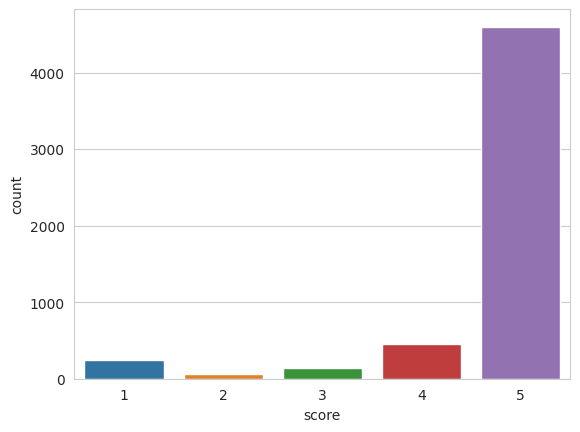

In [ ]:
# Missing values in the dataset
print(f"Number of null in label: { df['score'].isnull().sum() }")
print(f"Number of null in text: { df['content'].isnull().sum()}")
sns.countplot(x='score', data=df);

In [ ]:
df.groupby(by='label').agg('count')


,score,content,cleaned_text,content_len,punct,tokens,lemmatized_review
label,,,,,,,
0,445,445,445,445,445,445,445
1,5055,5055,5055,5055,5055,5055,5055


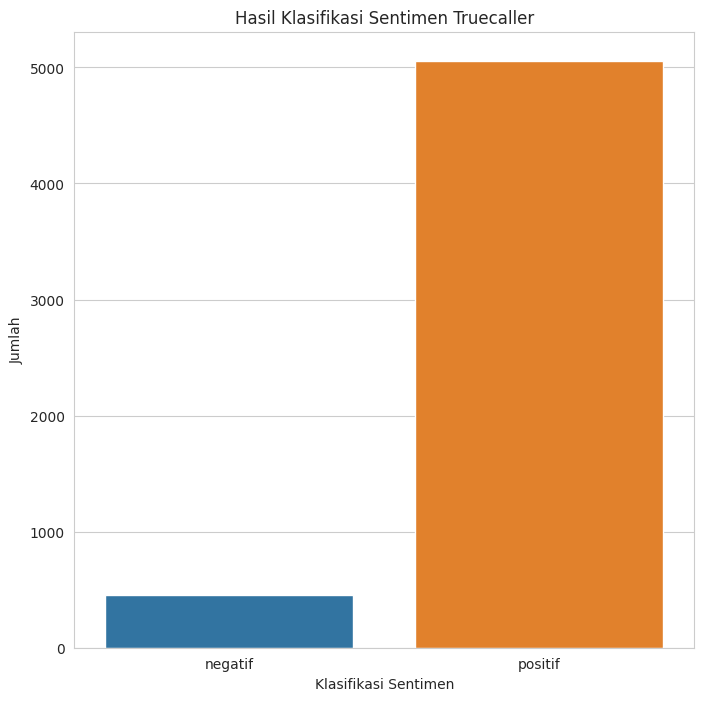

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
sentiment = ["negatif","positif"]
jumlah_sentiment = [455,5055]
sns.barplot(x=sentiment,y=jumlah_sentiment)
ax.set_ylabel('Jumlah')
ax.set_xlabel('Klasifikasi Sentimen')
ax.set_title('Hasil Klasifikasi Sentimen Truecaller')
plt.show()

Visualizing Word Clouds

In [ ]:
from wordcloud import WordCloud

In [ ]:
df_negative = df[ (df['score']==1.0) | (df['score']==2.0) | (df['score']==3.0)]
df_positive = df[ (df['score']==4.0) | (df['score']==5.0)]
#convert to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list= df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

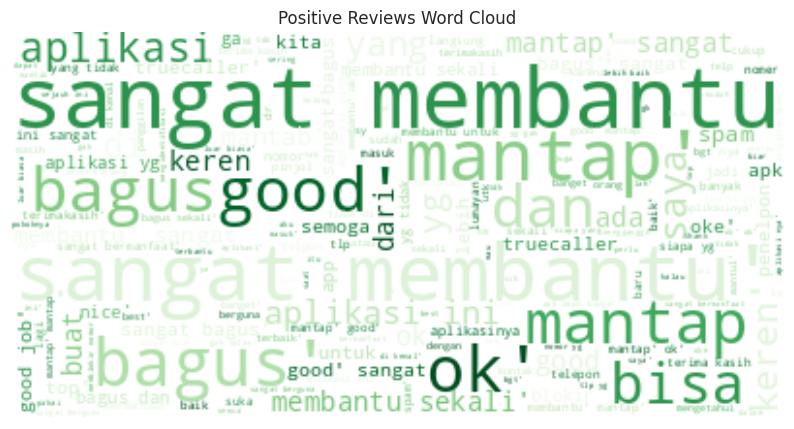

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

Word Cloud: Negative Reviews

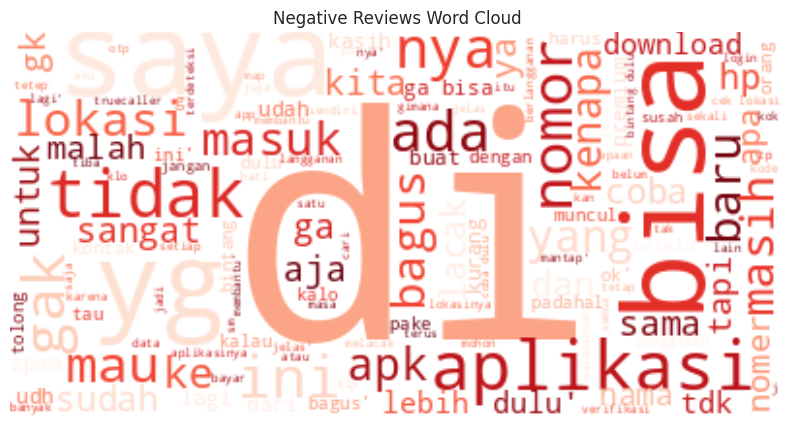

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

Feature Extraction from Text

In [ ]:
X = df[['lemmatized_review', 'content_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(5500, 3)
(5500,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3850, 3)
(1650, 3)
(3850,)
(1650,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['content_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['content_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,content_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

Visualize Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Algoritma: Support Vector Machine (SVM)

              precision    recall  f1-score   support

           0       0.68      0.30      0.42       139
           1       0.94      0.99      0.96      1511

    accuracy                           0.93      1650
   macro avg       0.81      0.64      0.69      1650
weighted avg       0.92      0.93      0.92      1650



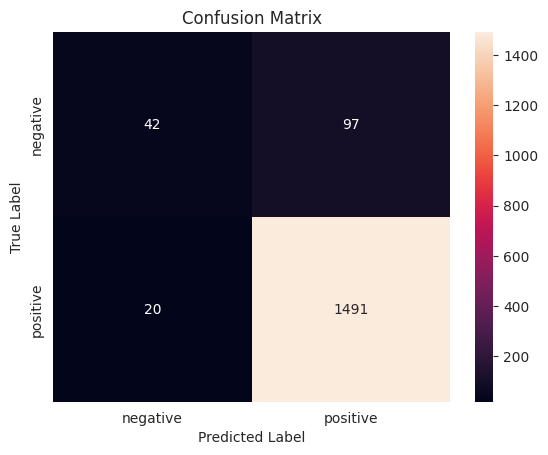

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect.values, y_train)
svm_pred = classifier.predict(X_test_vect.values)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Performing K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

models = [
          SVC(kernel = 'linear')
         ]
names = ["SVM"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect.values, y_train, scoring=score, cv=10).mean()} ")
    print()

SVM
 accuracy - 0.9363636363636362 
 precision - 0.9414702362915669 
 recall - 0.992664120315111 
 f1 - 0.9663610349528081 



Vectorizer: TF-IDF

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 10)
# from sklearn.ensemble import ExtraTreesClassifier
# classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.9296969696969697

In [ ]:
data = ["Buruk", "Bagus", "Aplikasi ini sangat membantu sekali"]
vect = tfidf.transform(data).toarray()

my_pred = classifier.predict(vect)
print(my_pred)

[0 1 1]
